In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier                            #导入决策树模型
from sklearn.naive_bayes import MultinomialNB,BernoulliNB                  #导入朴素贝叶斯算法
from sklearn.metrics import accuracy_score                                 #分类准确率分数是指所有分类正确的百分比。
from sklearn.model_selection import train_test_split                        #返回切分的数据集train/test
from sklearn.metrics import classification_report                          

In [2]:
import os
print(os.path.abspath('.'))

C:\Users\admin\Desktop\homework\dm\diabetes-prediction


In [3]:
diabetes_data = pd.read_csv("C:/Users/admin/Desktop/homework/dm/diabetes-prediction/diabetes.csv")
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
listname = ["Pregnancies","Glucose","BP","Skin","Insulin","BMI","Pedigree","Age","Label"]
diabetes_data.columns = listname                                                              #修改列名
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pregnancies  768 non-null    int64  
 1   Glucose      768 non-null    int64  
 2   BP           768 non-null    int64  
 3   Skin         768 non-null    int64  
 4   Insulin      768 non-null    int64  
 5   BMI          768 non-null    float64
 6   Pedigree     768 non-null    float64
 7   Age          768 non-null    int64  
 8   Label        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## 异常值处理

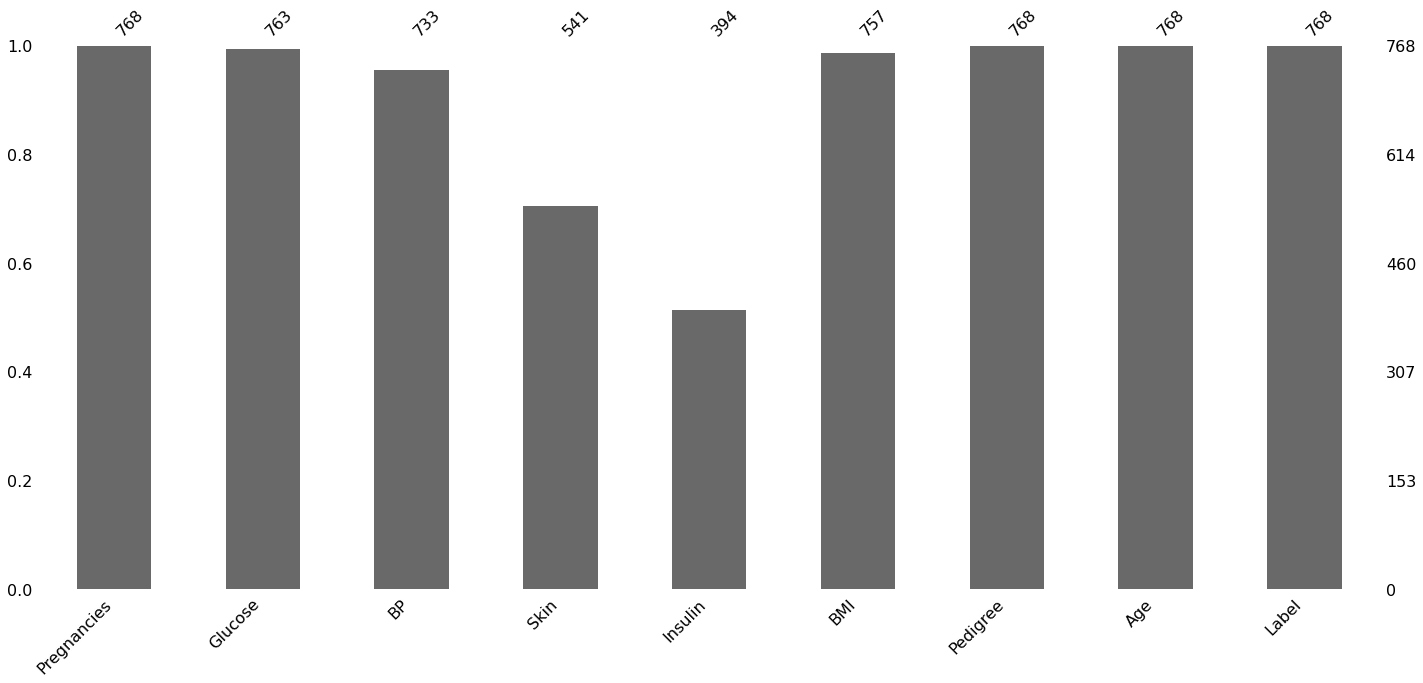

In [5]:
colume = ['Glucose', 'BP', 'Skin', 'Insulin', 'BMI']
diabetes_data[colume] = diabetes_data[colume].replace(0,np.nan)               #将0值替换为nan
import missingno as msno                                         #missingno提供了一个灵活且易于使用的缺失数据可视化和实用程序的小工具集
p=msno.bar(diabetes_data)

In [6]:
print(f"数据处理之前缺失值个数：\n{diabetes_data.isnull().sum()}" )
medians = diabetes_data.median() 
diabetes_data = diabetes_data.fillna(medians)
print(f"数据处理之后缺失值个数：\n{diabetes_data.isnull().sum()}")

数据处理之前缺失值个数：
Pregnancies      0
Glucose          5
BP              35
Skin           227
Insulin        374
BMI             11
Pedigree         0
Age              0
Label            0
dtype: int64
数据处理之后缺失值个数：
Pregnancies    0
Glucose        0
BP             0
Skin           0
Insulin        0
BMI            0
Pedigree       0
Age            0
Label          0
dtype: int64


# 描述性统计

In [7]:
diabetes_data.describe()

,Pregnancies,Glucose,BP,Skin,Insulin,BMI,Pedigree,Age,Label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## corr()和cov()方法会以DataFrame格式返回相关性和协方差矩阵

In [8]:
diabetes_data.corr()

,Pregnancies,Glucose,BP,Skin,Insulin,BMI,Pedigree,Age,Label
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BP,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
Skin,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
Pedigree,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Label,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


In [9]:
diabetes_data.cov()

,Pregnancies,Glucose,BP,Skin,Insulin,BMI,Pedigree,Age,Label
Pregnancies,11.354056,13.150057,8.503285,2.422243,7.290682,0.499439,-0.037426,21.570620,0.356618
Glucose,13.150057,926.489244,80.612899,51.541762,1102.883149,48.351206,1.384952,95.543147,7.154009
BP,8.503285,80.612899,146.328741,20.406652,47.402155,23.391138,-0.009532,46.222239,0.956140
Skin,2.422243,51.541762,20.406652,77.285567,118.172405,32.831966,0.297652,13.037818,0.900960
Insulin,7.290682,1102.883149,47.402155,118.172405,7462.033002,107.044997,3.620667,98.643681,8.396268
BMI,0.499439,48.351206,23.391138,32.831966,107.044997,47.268056,0.349522,2.069604,1.023213
Pedigree,-0.037426,1.384952,-0.009532,0.297652,3.620667,0.349522,0.109779,0.130772,0.027472
Age,21.570620,95.543147,46.222239,13.037818,98.643681,2.069604,0.130772,138.303046,1.336953
Label,0.356618,7.154009,0.956140,0.900960,8.396268,1.023213,0.027472,1.336953,0.227483


In [10]:
dia_df = diabetes_data                   
label_rate = dia_df.Label.value_counts() / len(dia_df)                   #（不）患糖尿病的比率
label_rate 

0    0.651042
1    0.348958
Name: Label, dtype: float64

In [11]:
label_Summary = dia_df.groupby('Label')
label_Summary.mean()                                                     #分组的数据比较

,Pregnancies,Glucose,BP,Skin,Insulin,BMI,Pedigree,Age
Label,,,,,,,,
0,3.298000,110.682000,70.920000,27.726000,127.792000,30.885600,0.429734,31.190000
1,4.865672,142.130597,75.123134,31.686567,164.701493,35.383582,0.550500,37.067164


### 使用seaborn中的pairplot()绘制两两特征图

程序运行时间: 8.005019299999999 Seconds


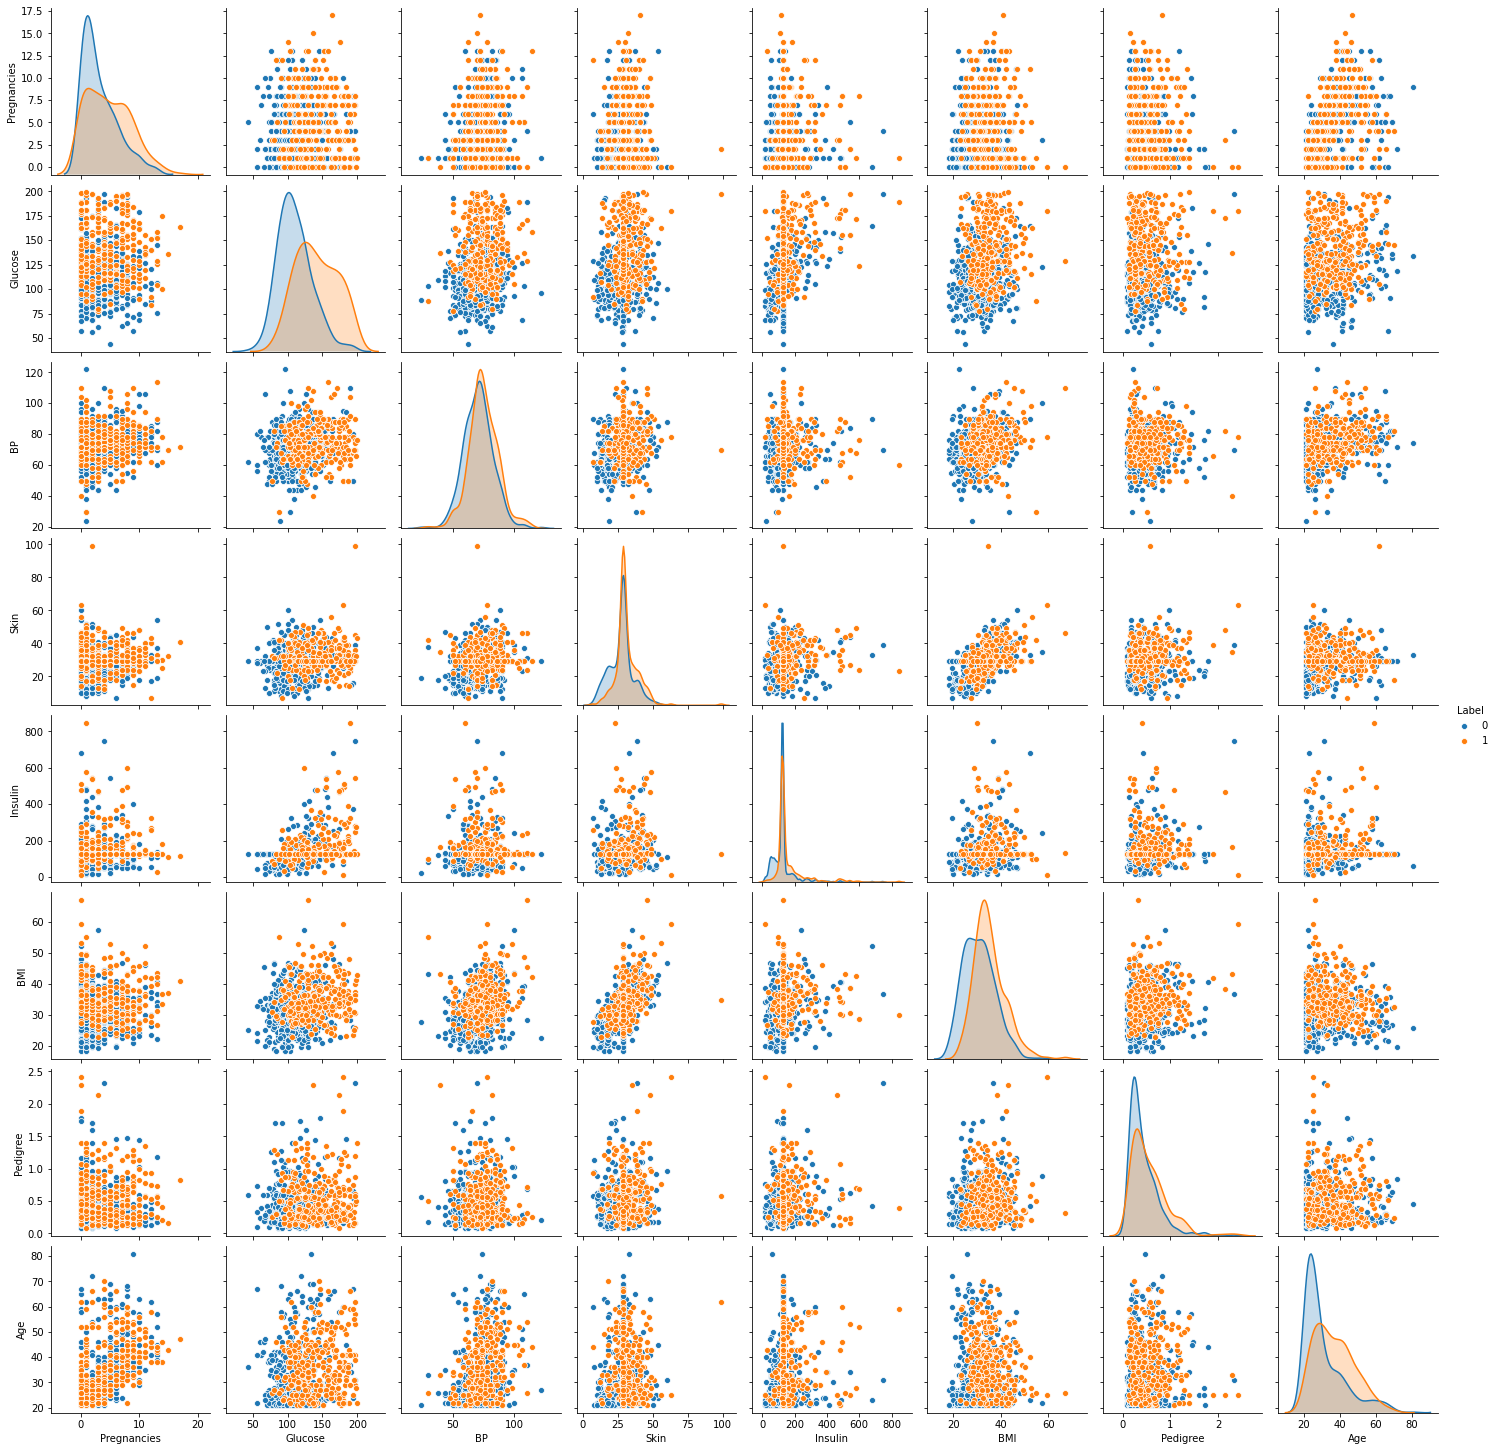

In [12]:
import timeit                                     #计算程序运行时间
start=timeit.default_timer()
import seaborn as sns
p=sns.pairplot(diabetes_data, hue = 'Label')
end=timeit.default_timer()
timeGNB=end-start
print(f'程序运行时间: {timeGNB} Seconds')

# 使用多种方法对糖尿病进行预测

## 1.决策树

In [13]:
# 选择预测所需的特征
feature_cols = ['Pregnancies','Glucose' ,'Insulin', 'BP','BMI', 'Age','Skin','Pedigree']
X = dia_df[feature_cols] # 特征
y = dia_df.Label # 类别标签

In [14]:
# 将数据分为训练和测试数据
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3) # 70% training and 30% test

In [15]:
# 创建决策树分类器
clf_dt = DecisionTreeClassifier(criterion='entropy' )                              #criterion：gini或者entropy,前者是基尼系数，后者是信息熵

# 训练模型
clf_dt = clf_dt.fit(X_train,y_train)

# 使用训练好的模型做预测
y_pred = clf_dt.predict(X_test)

auc_dt = accuracy_score(y_test, y_pred)
print ("---决策树---")
print ("决策树 AUC = %2.2f" % auc_dt)
print(classification_report(y_test, y_pred))

# 模型的准确性
print("使用决策树预测的准确率:",auc_dt)

---决策树---
决策树 AUC = 0.70
              precision    recall  f1-score   support

           0       0.72      0.77      0.74       133
           1       0.66      0.60      0.63        98

    accuracy                           0.70       231
   macro avg       0.69      0.68      0.69       231
weighted avg       0.69      0.70      0.69       231

使用决策树预测的准确率: 0.696969696969697


## 2.朴素贝叶斯法

In [16]:
from sklearn.naive_bayes import GaussianNB                #导入朴素贝叶斯算法
model_g =  GaussianNB()
model_g = model_g.fit(X_train,y_train)
pred_g = model_g.predict(X_test)

# 训练模型
nbm = model_g.fit(X_train,y_train)

# 使用训练好的模型做预测
y_pred = model_g.predict(X_test)

auc_nbg = accuracy_score(y_test, y_pred)
print ("---高斯朴素贝叶斯---")
print ("高斯朴素贝叶斯 AUC = %2.2f" % auc_nbg)
print(classification_report(y_test, y_pred))

# 模型的准确性
print("高斯朴素贝叶斯预测的准确率:",auc_nbg)

---高斯朴素贝叶斯---
高斯朴素贝叶斯 AUC = 0.74
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       133
           1       0.72      0.61      0.66        98

    accuracy                           0.74       231
   macro avg       0.73      0.72      0.72       231
weighted avg       0.73      0.74      0.73       231

高斯朴素贝叶斯预测的准确率: 0.7359307359307359


## 3.SVM方法

In [17]:
start=timeit.default_timer()
from sklearn import svm
model_svm = svm.SVC(C=1.0, kernel='linear', degree=3, gamma=1.0, coef0=0.0, shrinking=True, probability=False,tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, random_state=6)
model_svm.fit(X_train,y_train)

# 训练模型
svm = model_svm.fit(X_train,y_train)

# 使用训练好的模型做预测
y_pred = model_svm.predict(X_test)

auc_svm = accuracy_score(y_test, y_pred)
print ("---SVM---")
print ("SVM AUC = %2.2f" % auc_svm)
print(classification_report(y_test, y_pred))

# 模型的准确性
print(f"SVM预测的准确率:{auc_svm}")

end=timeit.default_timer()
timeGNB=end-start
print(f'程序运行时间: {timeGNB} Seconds')

---SVM---
SVM AUC = 0.72
              precision    recall  f1-score   support

           0       0.71      0.87      0.78       133
           1       0.75      0.51      0.61        98

    accuracy                           0.72       231
   macro avg       0.73      0.69      0.69       231
weighted avg       0.72      0.72      0.71       231

SVM预测的准确率:0.7186147186147186
程序运行时间: 3.518199599999999 Seconds


### 调参

## 1.选择不同kernel
- (1)kernel='rbf'
- (2)kernel='poly'
“linear”(线性）、“rbf”（径向基)、“poly”（多项式）(默认值是“rbf”)

In [18]:
start=timeit.default_timer()

from sklearn import svm
model_svm = svm.SVC(C=1.0, kernel='rbf', degree=3, gamma=1.0, coef0=0.0, shrinking=True, probability=False,tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, random_state=6)
model_svm.fit(X_train,y_train)

# 训练模型
svm = model_svm.fit(X_train,y_train)

# 使用训练好的模型做预测
y_pred = model_svm.predict(X_test)

auc_svm = accuracy_score(y_test, y_pred)
print ("---SVM---")
print ("SVM AUC = %2.2f" % auc_svm)
print(classification_report(y_test, y_pred))

# 模型的准确性
print(f"SVM预测的准确率:{auc_svm}")

end=timeit.default_timer()
timeGNB=end-start
print(f'程序运行时间: {timeGNB} Seconds')

---SVM---
SVM AUC = 0.58
              precision    recall  f1-score   support

           0       0.58      1.00      0.73       133
           1       0.00      0.00      0.00        98

    accuracy                           0.58       231
   macro avg       0.29      0.50      0.37       231
weighted avg       0.33      0.58      0.42       231

SVM预测的准确率:0.5757575757575758
程序运行时间: 0.057539900000001865 Seconds


E:\Application\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**kenel选择"linear"比选择"rbf"模型的预测效果更好，选择"poly"时，程序运行时间很长，故不做比较。**

## 2.选择不同C
- (1)C=10
- (2)C=100
误差项的惩罚参数C,它还控制平滑决策边界和正确分类训练点之间的权衡。

In [19]:
start=timeit.default_timer()
from sklearn import svm
model_svm = svm.SVC(C=10, kernel='linear', degree=3, gamma=1.0, coef0=0.0, shrinking=True, probability=False,tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, random_state=6)
model_svm.fit(X_train,y_train)

# 训练模型
svm = model_svm.fit(X_train,y_train)

# 使用训练好的模型做预测
y_pred = model_svm.predict(X_test)

auc_svm = accuracy_score(y_test, y_pred)
print ("---SVM---")
print ("SVM AUC = %2.2f" % auc_svm)
print(classification_report(y_test, y_pred))

# 模型的准确性
print(f"SVM预测的准确率:{auc_svm}")

end=timeit.default_timer()
timeGNB=end-start
print(f'程序运行时间: {timeGNB} Seconds')

---SVM---
SVM AUC = 0.72
              precision    recall  f1-score   support

           0       0.71      0.87      0.78       133
           1       0.75      0.52      0.61        98

    accuracy                           0.72       231
   macro avg       0.73      0.70      0.70       231
weighted avg       0.73      0.72      0.71       231

SVM预测的准确率:0.7229437229437229
程序运行时间: 37.11575190000001 Seconds


In [20]:
start=timeit.default_timer()
from sklearn import svm
model_svm = svm.SVC(C=100, kernel='linear', degree=3, gamma=1.0, coef0=0.0, shrinking=True, probability=False,tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, random_state=6)
model_svm.fit(X_train,y_train)

# 训练模型
svm = model_svm.fit(X_train,y_train)

# 使用训练好的模型做预测
y_pred = model_svm.predict(X_test)

auc_svm = accuracy_score(y_test, y_pred)
print ("---SVM---")
print ("SVM AUC = %2.2f" % auc_svm)
print(classification_report(y_test, y_pred))

# 模型的准确性
print(f"SVM预测的准确率:{auc_svm}")

end=timeit.default_timer()
timeGNB=end-start
print(f'程序运行时间: {timeGNB} Seconds')

---SVM---
SVM AUC = 0.75
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       133
           1       0.79      0.57      0.66        98

    accuracy                           0.75       231
   macro avg       0.76      0.73      0.73       231
weighted avg       0.76      0.75      0.74       231

SVM预测的准确率:0.7532467532467533
程序运行时间: 82.21501459999999 Seconds


**惩罚参数C增大时，模型预测的准确率和召回率有所提高，但是程序运行时间较长，需要做好权衡。**

## 3.选择不同gamma
- (1)gamma=10
- (2)gamma=100

gamma值高，将尝试精确匹配每一个训练数据集，但可能会导致泛化误差和引起过度拟合问题。

In [21]:
start=timeit.default_timer()
from sklearn import svm
model_svm = svm.SVC(C=30, kernel='linear', degree=3, gamma=10, coef0=0.0, shrinking=True, probability=False,tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, random_state=6)
model_svm.fit(X_train,y_train)

# 训练模型
svm = model_svm.fit(X_train,y_train)

# 使用训练好的模型做预测
y_pred = model_svm.predict(X_test)

auc_svm = accuracy_score(y_test, y_pred)
print ("---SVM---")
print ("SVM AUC = %2.2f" % auc_svm)
print(classification_report(y_test, y_pred))

# 模型的准确性
print(f"SVM预测的准确率:{auc_svm}")

end=timeit.default_timer()
timeGNB=end-start
print(f'程序运行时间: {timeGNB} Seconds')

---SVM---
SVM AUC = 0.74
              precision    recall  f1-score   support

           0       0.72      0.89      0.80       133
           1       0.78      0.52      0.63        98

    accuracy                           0.74       231
   macro avg       0.75      0.71      0.71       231
weighted avg       0.75      0.74      0.72       231

SVM预测的准确率:0.7359307359307359
程序运行时间: 46.93680400000005 Seconds


In [22]:
start=timeit.default_timer()
from sklearn import svm
model_svm = svm.SVC(C=30, kernel='linear', degree=3, gamma=100, coef0=0.0, shrinking=True, probability=False,tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, random_state=6)
model_svm.fit(X_train,y_train)

# 训练模型
svm = model_svm.fit(X_train,y_train)

# 使用训练好的模型做预测
y_pred = model_svm.predict(X_test)

auc_svm = accuracy_score(y_test, y_pred)
print ("---SVM---")
print ("SVM AUC = %2.2f" % auc_svm)
print(classification_report(y_test, y_pred))

# 模型的准确性
print(f"SVM预测的准确率:{auc_svm}")

end=timeit.default_timer()
timeGNB=end-start
print(f'程序运行时间: {timeGNB} Seconds')

---SVM---
SVM AUC = 0.74
              precision    recall  f1-score   support

           0       0.72      0.89      0.80       133
           1       0.78      0.52      0.63        98

    accuracy                           0.74       231
   macro avg       0.75      0.71      0.71       231
weighted avg       0.75      0.74      0.72       231

SVM预测的准确率:0.7359307359307359
程序运行时间: 46.26809610000009 Seconds


**gamma从1增加到10，模型预测准确率和召回率略有提升，从10增加到100，模型准确率和召回率基本不变**

- 选择最终模型 kernel="linear",gamma=10,C=30

In [24]:
start=timeit.default_timer()
from sklearn import svm
model_svm = svm.SVC(C=30, kernel='linear', degree=3, gamma=10, coef0=0.0, shrinking=True, probability=False,tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, random_state=6)
model_svm.fit(X_train,y_train)

# 训练模型
svm = model_svm.fit(X_train,y_train)

# 使用训练好的模型做预测
y_pred = model_svm.predict(X_test)

auc_svm = accuracy_score(y_test, y_pred)
print ("---SVM---")
print ("SVM AUC = %2.2f" % auc_svm)
print(classification_report(y_test, y_pred))

# 模型的准确性
print(f"SVM预测的准确率:{auc_svm}")

end=timeit.default_timer()
timeGNB=end-start
print(f'程序运行时间: {timeGNB} Seconds')

---SVM---
SVM AUC = 0.74
              precision    recall  f1-score   support

           0       0.72      0.89      0.80       133
           1       0.78      0.52      0.63        98

    accuracy                           0.74       231
   macro avg       0.75      0.71      0.71       231
weighted avg       0.75      0.74      0.72       231

SVM预测的准确率:0.7359307359307359
程序运行时间: 46.31327350000004 Seconds
